In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

/home/voland/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
!ls dataset

ls: cannot access 'dataset': No such file or directory


In [4]:
!ls

EDA.ipynb


In [5]:
df = pd.read_csv('../dataset/heart_cleveland_upload.csv')

In [6]:
df.sex.unique()

array([1, 0])

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [10]:
target = df['condition']
df.drop(['condition'], axis=1, inplace=True)

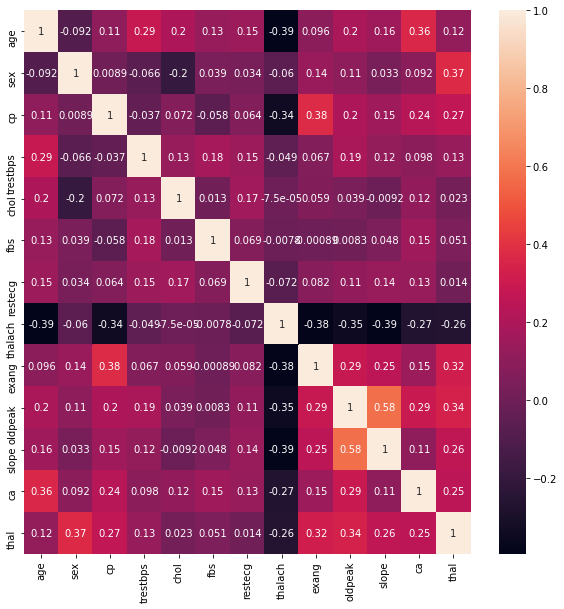

In [11]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))         
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [36]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


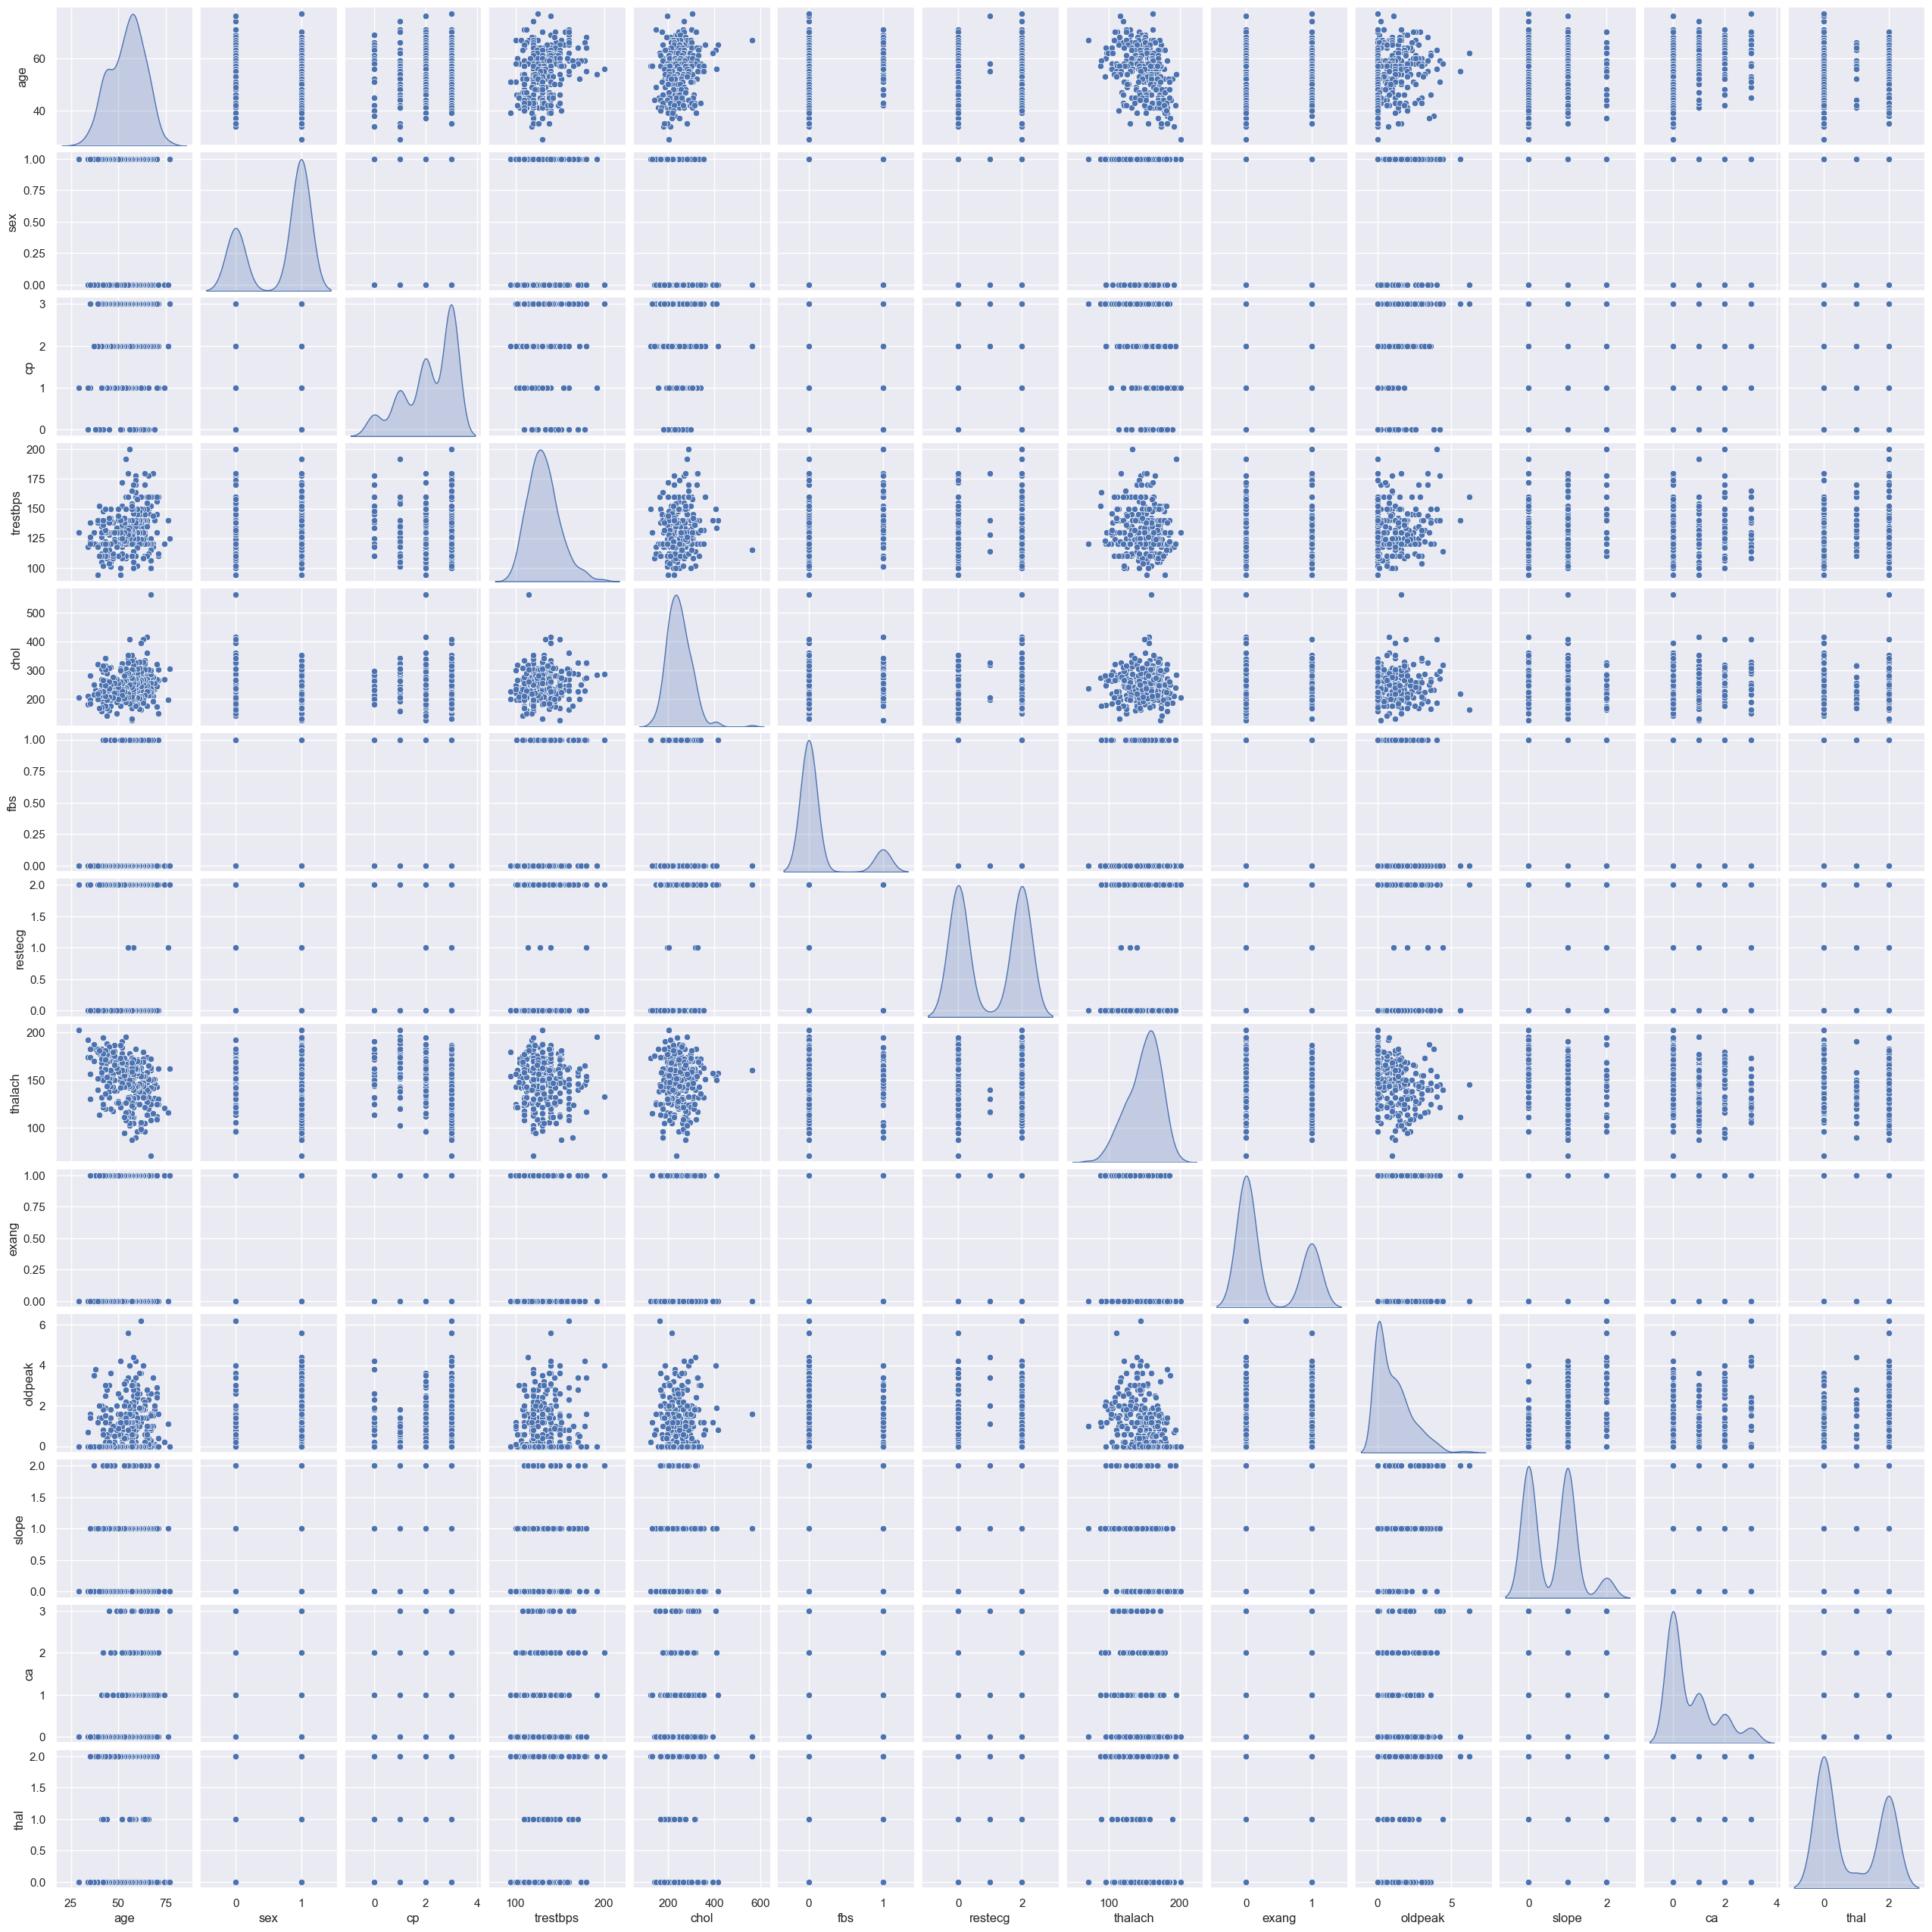

In [38]:
sn.set()
sn.pairplot(df[df.columns.values],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df, target,
                                                     random_state=0)
model_list = [SVC(), KNeighborsClassifier(), LinearRegression(), GaussianNB()]
name_list = ['Svc', 'Knn', 'Linear', 'Naive']
for model, name in zip(model_list, name_list):
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', model)])
    pipe.fit(X_train, y_train)
    print(name, pipe.score(X_test, y_test))

Svc 0.84
Knn 0.8133333333333334
Linear 0.5377039875329453
Naive 0.84


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from random import randint 

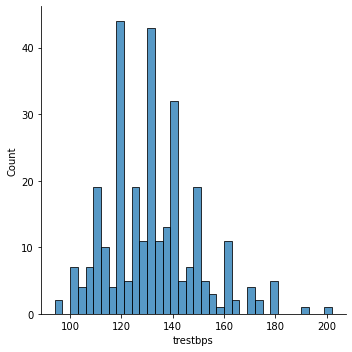

In [20]:
sn.displot(df.trestbps,  binwidth=3)


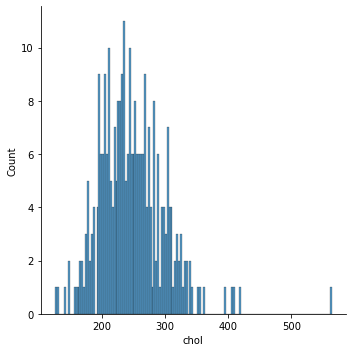

In [21]:
sn.displot(df.chol,  binwidth=3)


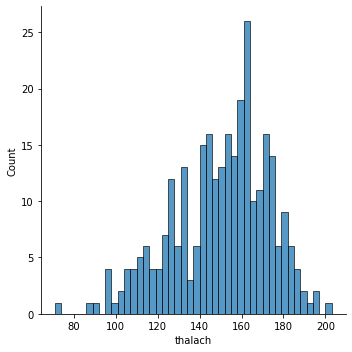

In [22]:
sn.displot(df.thalach,  binwidth=3)


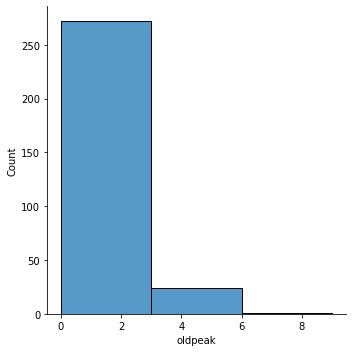

In [27]:
sn.displot(df.oldpeak,  binwidth=3)


In [14]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [21]:
data = [[randint(40, 80), randint(0, 1), randint(0, 3), randint(100, 180), randint(50, 350), randint(0, 1), randint(0, 2), 
        randint(90, 180), randint(0, 1), randint(0, 9), randint(0, 2), randint(0, 3), randint(0, 2)]
        for _ in range(10000)]
target = [randint(0, 1) for _ in range(10000)]

In [22]:
target = [randint(0, 1) for _ in range(10000)]

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pipe.predict(data), target)

NameError: name 'pipe' is not defined

In [24]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(pipe.predict(data), target)

0.5016

In [15]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                     random_state=0)
model_list = [SVC(), KNeighborsClassifier(), LinearRegression(), GaussianNB()]
name_list = ['Svc', 'Knn', 'Linear', 'Naive']
for model, name in zip(model_list, name_list):
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', model)])
    pipe.fit(X_train, y_train)
    print(name, pipe.score(X_test, y_test))

NameError: name 'data' is not defined